> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

# Exercise Set 2: Breast cancer

*February 14, 2020*

In this Exercise Set 2 we will work with the Breast Cancer dataset.

**Load data**

In [365]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
data_features = pd.DataFrame(
    np.hstack([raw_data['data'], raw_data['target'].reshape(-1, 1)]),
    columns=raw_data['feature_names'].tolist() + ['benign']
)
data_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


**Extract X and y**

In [366]:
X = raw_data['data']
y = raw_data['target']

<br>
<br>

## Random Forest

> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

In [ ]:
# This question will be in assignment 1

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

In [ ]:
# This question will be in assignment 1

> **Ex. 2.1.3**: Plot training and test accuracy of the random forest classifier as a function of `n_estimators`. Also indicate with a horizontal line (e.g. use `plt.axhline`) where the baseline accuracy lies (always guessing for majority class). Comparing and training and test performance, can you say something abotu how your model performs? And how does it perform relative to baseline? Report your maximum testing accuracy.
>
> *Hints: Use `StratifiedShuffleSplit` with the `cross_validate` method and give the latter the argument `return_train_score=True` to assess both training and test scores during cross validation. Also, you could let `n_estimators` vary on a logarithmic scale (like `np.logspace(np.log10(5), np.log10(500), 20)`) and log-scale the x-axis in your plot (`plt.xscale('log')`).*

In [ ]:
# This question will be in assignment 1

## Boosting

> **Ex. 2.2.1**: Repeat Ex. 2.1.3, but using AdaBoost. Do you notice any performance difference?

**ANS**

In [277]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

In [280]:
train_acc, test_acc = [], []
param_range = np.logspace(np.log10(50), np.log10(500), 20)
for param in tqdm(param_range):

    model = AdaBoostClassifier(n_estimators=int(param))
    #cv = ShuffleSplit(n_splits=20, test_size=.05, random_state=3)
    cv = KFold(n_splits=20)
    
    # accuracies
    scores = cross_validate(model, X, y, cv=cv, return_train_score=True)
    train_acc.append(np.mean(scores['train_score']))
    test_acc.append(np.mean(scores['test_score']))

100%|██████████| 20/20 [04:06<00:00, 12.34s/it]


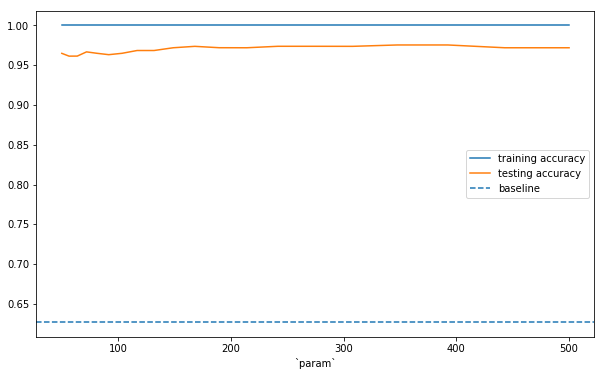

In [281]:
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_acc, label="training accuracy")
plt.plot(param_range, test_acc, label="testing accuracy")
plt.axhline(sum(y) / len(y), ls="--", label="baseline")
#plt.ylim(0.81, 0.9)
plt.xlabel("`param`")
plt.legend()
plt.show()

In [282]:
max(test_acc)

0.9754926108374387

AdaBoost is 1.5 percent points more accurate!

## Gradient boosting

> **Ex. 2.2.1**: Repeat Ex. 2.1.3, but using `sklearn.ensemble.GradientBoostingClassifier`. Do you notice any performance difference?

In [416]:
from sklearn.ensemble import GradientBoostingClassifier

In [429]:
train_acc, test_acc = [], []
param_range = np.logspace(np.log10(50), np.log10(1000), 20)
for param in tqdm(param_range):

    model = GradientBoostingClassifier(n_estimators=int(param), max_depth=1, subsample=0.5)
    #cv = ShuffleSplit(n_splits=20, test_size=.05, random_state=3)
    cv = KFold(n_splits=20)
    
    # accuracies
    scores = cross_validate(model, X, y, cv=cv, return_train_score=True)
    train_acc.append(np.mean(scores['train_score']))
    test_acc.append(np.mean(scores['test_score']))

100%|██████████| 20/20 [01:51<00:00,  5.58s/it]


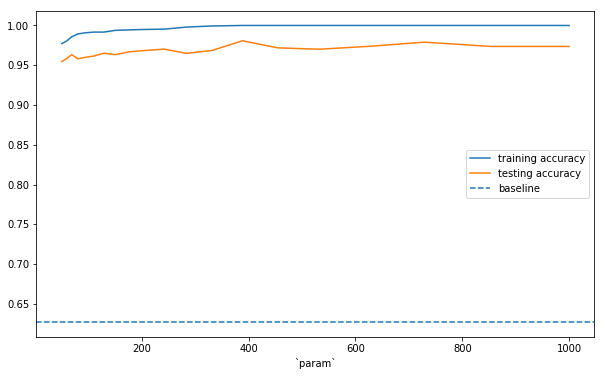

In [430]:
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_acc, label="training accuracy")
plt.plot(param_range, test_acc, label="testing accuracy")
plt.axhline(sum(y) / len(y), ls="--", label="baseline")
#plt.ylim(0.81, 0.9)
plt.xlabel("`param`")
plt.legend()
plt.show()

In [431]:
max(test_acc)

0.9807881773399016

I can up the performance slightly.

## Decision tree mechanism

Here you will be manually implementing the decision tree mechanism across a number of connected exercises.

>**Ex. 2.3.1**: Find the best feature to split on. There are many ways to do this, and we will be very practical about this and use the Pearson correlatio coefficient between a feature and the outcome, as an indicator of goodness.
Therefore, write a function that takes your input data `data_features` as input and returns the name of the feature that has the highest absolute (positive or negative) correlation with the outcome.
Use this function on your data to find the best initial feature to split on.
>
> *Hint: You can use `scipy.stats.pearsonr` to compute the correlation coefficient. E.g. to compute the absolute correlation coefficient between two variables `a` and `b`, I would write `abs(pearsonr(a, b)[0])`.*

**ANS**

In [380]:
from scipy.stats import spearmanr

def best_feature(data):
    correlations = []
    for feature in data_features.columns[:-1]:
        correlations.append(
            abs(spearmanr(data[feature], data['benign'])[0])
        )
    top_i = np.argmax(correlations)
    return data_features.columns[top_i]

In [381]:
best_feature(data_features)

'worst perimeter'

>**Ex. 2.3.2**: Read about [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)). Write a function that computes the Shannon-entropy of a probability vector. Compute the Shannon entropy of `p=[0.4, 0.6]`.

**ANS**

In [289]:
def shannon_entropy(p):
    return - sum([p_ * np.log2(p_) for p_ in p])

shannon_entropy([0.4, 0.6])

0.9709505944546686

>**Ex. 2.3.3**: Compute split entropy. 
1. Write a function `split_data_on(data, feature, thr)` that takes as input your data, initially `data_features`, a threshold, `thr`, and a feature, `feature`, and then splits the data into two subsets (also `pandas.Dataframe`s), `data0` and `data1`, where samples in `data0` have `data[feature] > thr` and samples in `data1` have `data[feature] > thr`. Use it to split `data_features` on the 'worst perimeter' feature at 105.9, to create two new variables `data0` and `data1` and print their number of rows.
1. Write another function `outcome_entropy(data)` that computes the entropy of outcomes ('benign' column), given a subset. Print the entropies of `data0` and `data1`.
2. Write a final function `split_entropy(data0, data1)` that uses the previous function to compute the split entropy (i.e. weighted average of both resulting subsets). Compute the split entropy.

**ANS**

**1**

In [387]:
def split_data_on(data, feature, thr):
    """Function that splits the data on the given feature and
    returns two new datasets.
    """
    mask = data[feature] > thr
    return data[~mask], data[ mask]

data0, data1 = split_data_on(data_features, 'worst perimeter', 105.9)
print(data0.shape[0], data1.shape[0])

345 224


**2**

In [388]:
from collections import Counter

def outcome_entropy(datai):
    def _probability_dist_of_labels(list_of_labels):
        label_counts = Counter(list_of_labels)
        return [v/sum(label_counts.values()) for k, v in label_counts.items()]
    return shannon_entropy(_probability_dist_of_labels(datai['benign']))

print(outcome_entropy(data0))
print(outcome_entropy(data1))

0.2833107377061481
0.5559671540224538


**3**

In [389]:
def split_entropy(data0, data1):
    # Compute entropies
    ent0 = outcome_entropy(data0)
    ent1 = outcome_entropy(data1)

    # Compute weights
    w0 = data0.shape[0] / (data0.shape[0] + data1.shape[0])
    w1 = data1.shape[0] / (data0.shape[0] + data1.shape[0])

    # Return result
    return ent0 * w0 + ent1 * w1

split_entropy(data0, data1)

0.39064823727530884

>**Ex. 2.3.4**: Find the optimal split threshold. Write a function called `optimal_threshold(data, feature)`
that takes as input your data and a feature, and loops over all possible splits for a feature such as to find and return the minimum split entropy and associated threshold. Execute it for 'worst perimeter' does this match up with your results from 2.3.2?

In [390]:
def optimal_threshold(data, feature):
    return min(
        [
            (
                thr,
                split_entropy(*split_data_on(data, feature, thr))
            )
            for thr in data[feature]
        ],
        key=lambda kv: kv[1]
    )

optimal_threshold(data_features, 'worst perimeter')

(105.9, 0.39064823727530884)

>**Ex. 2.3.5**: Now you have (1) a function that finds the best feature to split on, given dataframe of data, and (2) another function that computes the threshold at which to split it into two new subsets. Implement the decision tree mechanism, and print the maximum entropy path.
>1. Implement the following pseudocode and print the output:<br><br>
>Step 0. Initially, set `data = data_features`.<br>
>Step 1. Find the feature that gives the lowest split entropy for `data` (use `best_feature`). Print the name of the feature.<br>
>Step 2. Split `data` *on the optimal threshold* of that feature, to produce `data0` and `data1` (use `optimal_threshold` to find the optimal threshold and then use `split_data_on` to actually split it). Print the entropy of each, as well as their weighted avg. entropy (i.e. the split entropy).<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](https://github.com/abjer/sds_eml_2020/blob/master/material/session_2/solution_2.3.5.1.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How many splits are there? Does average entropy always decrease? Anything else worth commenting on?
>3. Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of splits you just printed (a comment is fine)?

**ANS**

**1**

In [415]:
# step 0: Make new variable `data`
data = data_features.copy() 

i = 0
while True:
    
    # step 4
    if len(data) < 5:
        break
        
    # step 1
    split_feature = best_feature(data)
    
    # step 2a
    thr, ent = optimal_threshold(data, split_feature)
    
    # step 2b
    data0, data1 = split_data_on(data, split_feature, thr)

    # step 3
    ent0 = outcome_entropy(data0)
    ent1 = outcome_entropy(data1)
    
    # Print output
    print(f"Split {i}: {split_feature}")
    print("-" * len(f"Split {i}: {split_feature}"))
    print("    data0:")
    print(f"        size:    {len(data0)}")
    print(f"        entropy: {ent0}")
    print("    data1:")
    print(f"        size:    {len(data1)}")
    print(f"        entropy: {ent1}")
    print(f"    --> average entropy: {ent}\n")
    
    # step 3 (continued)
    if ent0 > ent1:
        data = data0
    else:
        data = data1
    
    i += 1

Split 0: worst perimeter
------------------------
    data0:
        size:    345
        entropy: 0.2833107377061481
    data1:
        size:    224
        entropy: 0.5559671540224538
    --> average entropy: 0.39064823727530884

Split 1: mean concave points
----------------------------
    data0:
        size:    34
        entropy: 0.9596868937742169
    data1:
        size:    190
        entropy: 0.25186284771956513
    --> average entropy: 0.35930042613857477

Split 2: worst texture
----------------------
    data0:
        size:    16
        entropy: 0.3372900666170139
    data1:
        size:    18
        entropy: 0.9182958340544896
    --> average entropy: 0.6448813552603834

Split 3: concavity error
------------------------
    data0:
        size:    14
        entropy: 0.5916727785823275
    data1:
        size:    4
        entropy: -0.0
    --> average entropy: 0.4601899388973658

Split 4: concave points error
-----------------------------
    data0:
        size:    1

**Comment:** It tends to shave off a high-entropy chunk and a small-entropy chunk. If the high-entropy chunk were always bigger than
the small entropy chunk, then we would likely see split entropy decrease monotously, but already at split 1 we see
that the small chunk has the highest entropy, and as such we continue splitting on that. Because this happens
we end up having to split a very small chunk of data, and potentially, this is not easily split to the average split
entropy rises again.

**3**

In [399]:
from sklearn.tree import DecisionTreeClassifier

# train model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(data_features.drop("benign", axis=1), data_features.benign)

# print feature importances
sorted(zip(data_features.columns[:-1], model.feature_importances_), key=lambda kv: kv[1], reverse=True)[:10]

[('worst perimeter', 0.6858889407411874),
 ('worst concave points', 0.1007829871346577),
 ('worst texture', 0.05690144222889103),
 ('worst smoothness', 0.04462567019858399),
 ('area error', 0.01759705469311716),
 ('worst symmetry', 0.017287741269216263),
 ('smoothness error', 0.01397028994778079),
 ('mean radius', 0.013472884788102825),
 ('worst area', 0.012512713022021418),
 ('mean smoothness', 0.011973493890974152)]

**Comment:** The decision tree heavily overweights the importance of the first feature it splits on, but we see it
chooses the same one as we do. For the remainder, there are differences, of course because we only split on the most
entropous subset.

>**Challenge!**: Finish the implementation and write a piece of code that makes all splits at each level, level-for-level for 4 levels.
You can store the tree as a nested dictionary with a structure like:
>
>        mytree = {
>            'majority': 1,
>            'feature': 'worst perimeter',
>            'threshold': 105.9,
>            'leafs': {
>                {
>                    'less than or equal to': {
>                        'majority': 1,
>                        'feature': 'mean concave points',
>                        'threshold': 0.05102,
>                        'leafs': {...}
>                    },
>                    'greater than': {
>                        'majority': 0,
>                        'feature': 'mean concave points',
>                        'threshold': 0.04835,
>                        'leafs': {...}
>                    }
>                }
>            }
>        }
>
> ... which will allow you to write another bit of code that takes an arbitrary data point and produces a prediction.
>
> *Note: Implementing and fitting a classifier manually is **no small accomplishment**! If you manage, you can easily add it to your Github
portfolio and brag about it in a Medium blog post (if written well will probably get picked up by 'Towards
Data Science' or similar), on LinkedIn or Twitter. To quote Edison: "Opportunity is missed by most people because it is dressed in overalls and looks like work."*